In [1]:
##### Audio Classification Using Machine Learning
#####dataset url https://urbansounddataset.weebly.com/urbansound8k.html

In [2]:
!pip install librosa

  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201381 sha256=283f5400bc8584e47e1e4068cfc2e379e766a62b67267abf1eb6969d7b548021
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\aa\5a\92\d52f6f8560ff05a2525e6030a1903412df876714241fb76802
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23146 sha256=e121b9ecb45c45e6f36bef93c188b1397ae78d65e667904a3f4e3525d8d1b938
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320724 sha256=78065612861257647a7b0c612d5736a8b3793cf1188725a3dda5db5919b13ded
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built librosa audioread resampy


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
filename='dog.wav'

In [6]:
import IPython.display as ipd

In [7]:
plt.figure(figsize=(15,6))
ipd.Audio(filename)

<Figure size 1080x432 with 0 Axes>

In [8]:
import librosa
import librosa.display

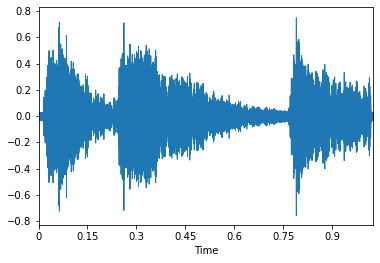

In [9]:
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)

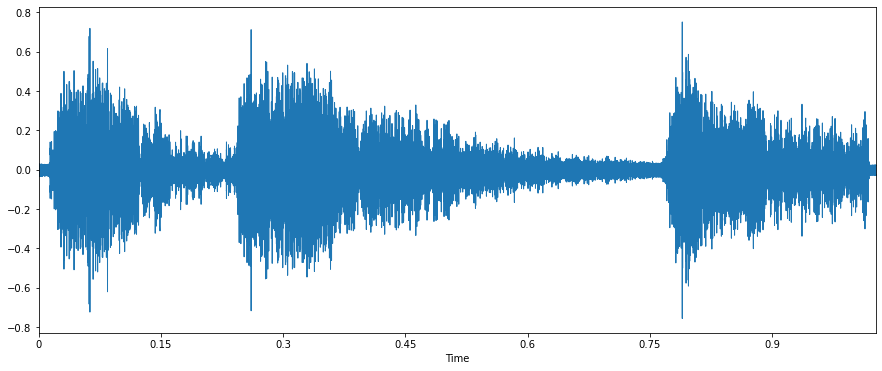

In [11]:
#example of dog sound
plt.figure(figsize=(15,6))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)



In [12]:
sample_rate

22050

In [13]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [14]:
wave_sample_rate

44100

In [15]:
wave_audio

array([[ 189,  903],
       [ 219,  924],
       [ 410, 1105],
       ...,
       [ 464, 1165],
       [ 472, 1172],
       [ 460, 1161]], dtype=int16)

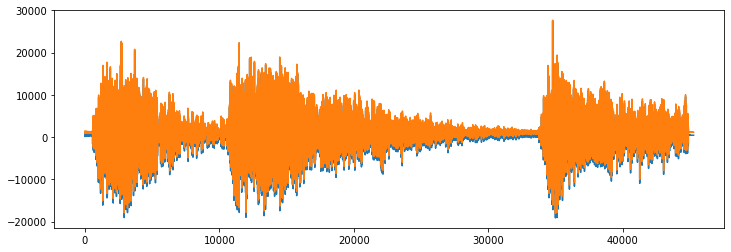

In [20]:
#original audio with 2 channels
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [16]:
data

array([0.0118503 , 0.02433892, 0.03285096, ..., 0.02532972, 0.0242239 ,
       0.0262953 ], dtype=float32)

In [17]:
import pandas as pd

metadata=pd.read_csv('sound/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [18]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

jackhammer          1000
air_conditioner     1000
drilling            1000
dog_bark            1000
street_music        1000
children_playing    1000
engine_idling       1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# data preprocessing

# Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [21]:
mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 45)


In [22]:
mfccs

array([[-145.9959    ,  -58.55054   ,  -18.373701  , ..., -139.04514   ,
        -161.64276   , -175.02928   ],
       [  34.88153   ,   21.203281  ,   15.42869   , ...,   57.16871   ,
          69.237785  ,   64.28281   ],
       [ -59.699505  ,  -64.825745  ,  -67.391846  , ..., -109.24519   ,
        -114.914986  ,  -91.860275  ],
       ...,
       [   5.461154  ,    5.972575  ,    6.5949893 , ...,    7.832017  ,
           4.5864725 ,    8.53163   ],
       [   1.0950934 ,    6.10264   ,    5.7949862 , ...,    5.687995  ,
           5.1244044 ,    3.233696  ],
       [   1.6081306 ,    4.771326  ,    0.23688364, ...,    7.572069  ,
          11.303546  ,    8.019569  ]], dtype=float32)

In [24]:
#### Extracting MFCC's For every audio file


In [25]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [29]:
pip install os-win

Note: you may need to restart the kernel to use updated packages.Collecting os-win



  ERROR: Command errored out with exit status 1:
   command: 'E:\anaconda\envs\dp\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ACER\\AppData\\Local\\Temp\\pip-install-dd5ttwer\\netifaces\\setup.py'"'"'; __file__='"'"'C:\\Users\\ACER\\AppData\\Local\\Temp\\pip-install-dd5ttwer\\netifaces\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\ACER\AppData\Local\Temp\pip-wheel-94l__lyu'
       cwd: C:\Users\ACER\AppData\Local\Temp\pip-install-dd5ttwer\netifaces\
  Complete output (5 lines):
  running bdist_wheel
  running build
  running build_ext
  building 'netifaces' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  ----------------------------------------
  ERROR: Failed building wheel

  Running setup.py clean for netifaces
Failed to build netifaces
    Running setup.py install for netifaces: started
    Running setup.py install for netifaces: finished with status 'error'


In [33]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath('E:/Audio Classification project/sound'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [07:45, 12.79it/s]E:\anaconda\envs\dp\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8324it [13:06, 24.93it/s]E:\anaconda\envs\dp\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
E:\anaconda\envs\dp\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [13:30, 10.77it/s]


In [34]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [63]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [64]:
X.shape

(8732, 40)

In [65]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [66]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [68]:
### Label Encoding
#y=np.array(pd.get_dummies(y))

In [39]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [69]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [70]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786109e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844025e+00, -5.2119040e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335975e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530845e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321608e+00]], dtype=float32)

In [71]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
X_train.shape

(6985, 40)

In [44]:
y_train.shape

(6985, 10)

In [45]:
X_test.shape

(1747, 40)

# Model Creation

In [46]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [48]:
# number of classes
num_labels=y.shape[1]

In [49]:
num_labels

10

In [50]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [52]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [53]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
202/219 [==========================>...] - ETA: 0s - loss: 11.9795 - accuracy: 0.1222
Epoch 00001: val_loss improved from inf to 2.28521, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 11.3153 - accuracy: 0.1231 - val_loss: 2.2852 - val_accuracy: 0.1082
Epoch 2/100
216/219 [============================>.] - ETA: 0s - loss: 2.6480 - accuracy: 0.1228
Epoch 00002: val_loss improved from 2.28521 to 2.27616, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.6474 - accuracy: 0.1231 - val_loss: 2.2762 - val_accuracy: 0.1116
Epoch 3/100
203/219 [==========================>...] - ETA: 0s - loss: 2.3436 - accuracy: 0.1236
Epoch 00003: val_loss improved from 2.27616 to 2.23024, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.3375 - accuracy: 0.1246 - val_loss: 2.2302 - val_ac

217/219 [============================>.] - ETA: 0s - loss: 1.4006 - accuracy: 0.5104
Epoch 00025: val_loss improved from 1.20646 to 1.18051, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.3991 - accuracy: 0.5108 - val_loss: 1.1805 - val_accuracy: 0.6125
Epoch 26/100
219/219 [==============================] - ETA: 0s - loss: 1.3863 - accuracy: 0.5258
Epoch 00026: val_loss improved from 1.18051 to 1.13877, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.3863 - accuracy: 0.5258 - val_loss: 1.1388 - val_accuracy: 0.6319
Epoch 27/100
202/219 [==========================>...] - ETA: 0s - loss: 1.3811 - accuracy: 0.5292
Epoch 00027: val_loss did not improve from 1.13877
219/219 [==============================] - 1s 3ms/step - loss: 1.3831 - accuracy: 0.5304 - val_loss: 1.1588 - val_accuracy: 0.6222
Epoch 28/100
201/219 [==========================>...]

Epoch 51/100
210/219 [===========================>..] - ETA: 0s - loss: 1.0980 - accuracy: 0.6292
Epoch 00051: val_loss improved from 0.89284 to 0.88452, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.0970 - accuracy: 0.6298 - val_loss: 0.8845 - val_accuracy: 0.7121
Epoch 52/100
204/219 [==========================>...] - ETA: 0s - loss: 1.0976 - accuracy: 0.6261
Epoch 00052: val_loss did not improve from 0.88452
219/219 [==============================] - 1s 3ms/step - loss: 1.0990 - accuracy: 0.6262 - val_loss: 0.8981 - val_accuracy: 0.7041
Epoch 53/100
217/219 [============================>.] - ETA: 0s - loss: 1.0867 - accuracy: 0.6342
Epoch 00053: val_loss did not improve from 0.88452
219/219 [==============================] - 1s 6ms/step - loss: 1.0878 - accuracy: 0.6344 - val_loss: 0.9072 - val_accuracy: 0.7058
Epoch 54/100
210/219 [===========================>..] - ETA: 0s - loss: 1.0970 - accuracy: 0.6265
Ep

Epoch 78/100
205/219 [===========================>..] - ETA: 0s - loss: 1.0083 - accuracy: 0.6646
Epoch 00078: val_loss did not improve from 0.80244
219/219 [==============================] - 1s 3ms/step - loss: 1.0112 - accuracy: 0.6644 - val_loss: 0.8199 - val_accuracy: 0.7304
Epoch 79/100
212/219 [============================>.] - ETA: 0s - loss: 0.9946 - accuracy: 0.6621
Epoch 00079: val_loss did not improve from 0.80244
219/219 [==============================] - 1s 6ms/step - loss: 0.9936 - accuracy: 0.6628 - val_loss: 0.8095 - val_accuracy: 0.7407
Epoch 80/100
212/219 [============================>.] - ETA: 0s - loss: 0.9943 - accuracy: 0.6708
Epoch 00080: val_loss improved from 0.80244 to 0.80198, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 0.9898 - accuracy: 0.6723 - val_loss: 0.8020 - val_accuracy: 0.7367
Epoch 81/100
208/219 [===========================>..] - ETA: 0s - loss: 0.9960 - accuracy: 0.6659
Ep

In [54]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7710360884666443


In [56]:
filename='dog.wav'

In [57]:
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1], dtype=int64)

In [59]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

# Testing Some Test Audio Data
Steps

- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [74]:
filename="test.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.15084534e+02  1.50071930e+02 -5.63045845e+01  2.73422852e+01
  4.23830986e+00  7.06213856e+00  6.64222527e+00  2.77046089e+01
 -1.77596283e+01  1.69168034e+01 -4.75508070e+00 -4.52362394e+00
 -6.51600170e+00  1.46063108e+01 -1.74113169e-01  1.17512569e+01
  7.26487350e+00  6.71827173e+00  3.63909554e+00  8.43045044e+00
 -6.88724089e+00 -1.23232689e+01 -5.84170866e+00  3.25641537e+00
  5.43340206e+00 -5.32827473e+00 -4.76442909e+00  1.08845577e+01
  1.53099089e+01 -1.93116188e+00 -2.29621677e+01 -1.27577715e+01
  1.22096138e+01  1.66158447e+01  3.80003428e+00  4.77674484e+00
 -2.42431474e+00 -1.72140617e+01 -1.13611317e+01  1.38698730e+01]
[[-2.15084534e+02  1.50071930e+02 -5.63045845e+01  2.73422852e+01
   4.23830986e+00  7.06213856e+00  6.64222527e+00  2.77046089e+01
  -1.77596283e+01  1.69168034e+01 -4.75508070e+00 -4.52362394e+00
  -6.51600170e+00  1.46063108e+01 -1.74113169e-01  1.17512569e+01
   7.26487350e+00  6.71827173e+00  3.63909554e+00  8.43045044e+00
  -6.88724089e+00 -

array(['car_horn'], dtype='<U16')